## 1.02 Trend
+ A trend is a pattern that is observed over a period of time and represents the **mean rate of change with respect to time**.
+ trend usually shows the tendency of the data to increase/uptrend or decrease/downtrend during the long run

### Detecting Trend Using a Hodrick-Prescott Filter
Фильтр Ходрика-Прескотта (HP) стал эталоном для избавления от трендовых движений в данных.

Метод непараметрический и используется для разделения временного ряда на
+ тренд (тенденция)
+ на циклический компонент


Как и все непараметрические методы, фильтр HP в значительной степени зависит от параметра настройки, который контролирует степень сглаживания.

In [9]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
file = 'data/dow jones.xlsx'
df = pd.read_excel(file, parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000
2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000
2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000
2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000


In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

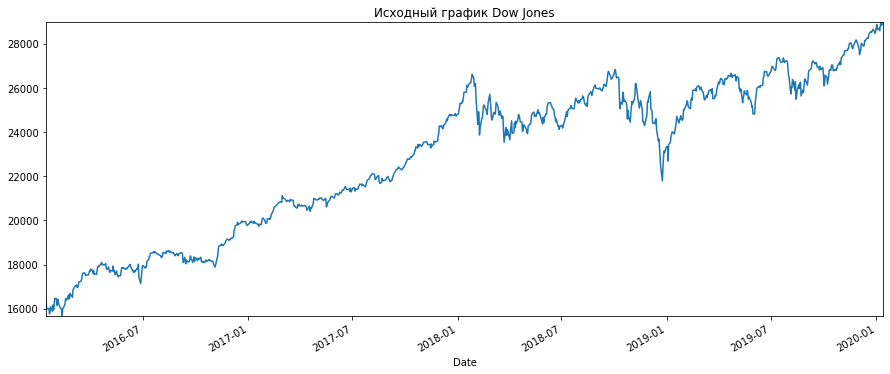

In [11]:
df['Close'].plot(figsize=(15,6)).autoscale(enable=True, axis='both', tight=True)
plt.title('Исходный график Dow Jones');

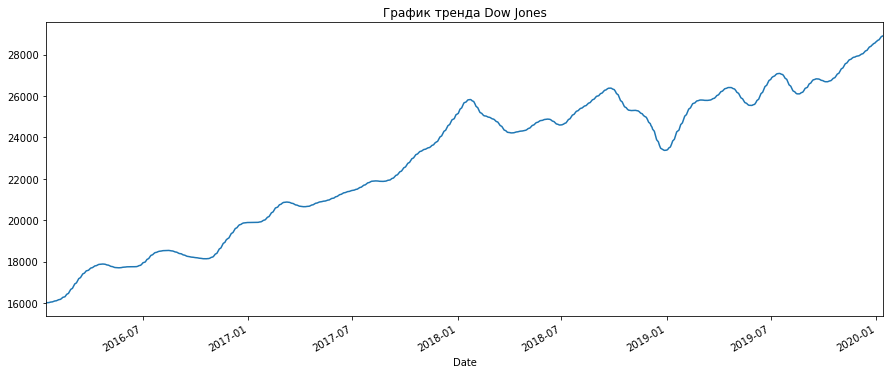

In [12]:
close_cycle, close_trend = hpfilter(df['Close'], lamb=1600)
close_trend.plot(figsize=(15,6)).autoscale(axis='x', tight=True)
plt.title('График тренда Dow Jones');

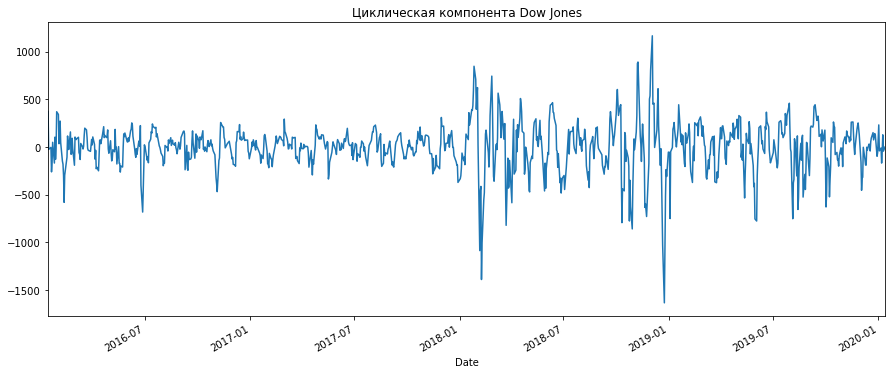

In [13]:
close_cycle.plot(figsize=(15,6)).autoscale(axis='x', tight=True)
plt.title('Циклическая компонента Dow Jones');

### Detrending a Time Series
Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time.

Methods to detrend time-series data:
+ Pandas differencing
+ SciPy signal
+ HP filter

#### Detrending Using Pandas Differencing
+ метод `diff()`
+ It can provide a period value to shift in order to form the difference

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

file = 'data/dow jones.xlsx'
df = pd.read_excel(file, index_col=0, parse_dates=True)

diff = df['Close'].diff()
diff[:5]

Date
2016-01-14           NaN
2016-01-15   -390.969727
2016-01-19     27.939453
2016-01-20   -249.279297
2016-01-21    115.939454
Name: Close, dtype: float64

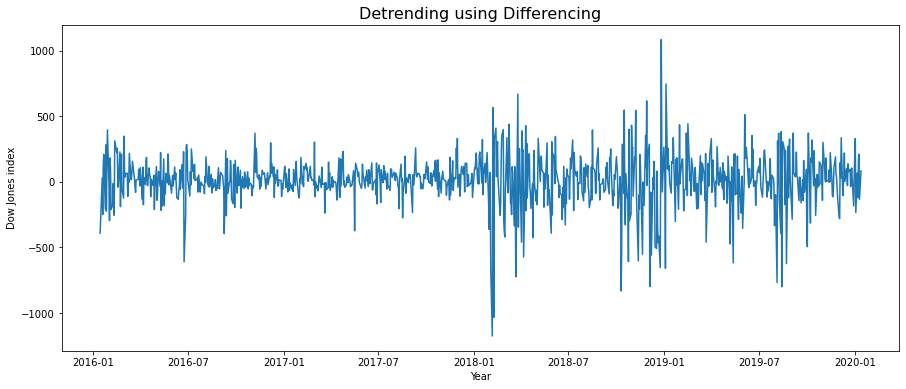

In [22]:
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dow Jones index')
plt.show()

#### Detrending Using a SciPy Signal
+ A signal is another form of time-series data. 
+ Every signal either increases or decreases in a different order.
+ `Signal.detrend` is a submodule of SciPy that is used to remove a linear trend along an axis from data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

file = 'data/dow jones.xlsx'
df = pd.read_excel(file, index_col=0, parse_dates=True)

detrend = signal.detrend(df['Close'].values)
detrend[:5]

array([ -799.39309237, -1201.69519886, -1185.08812535, -1445.69980183,
       -1341.09272732])

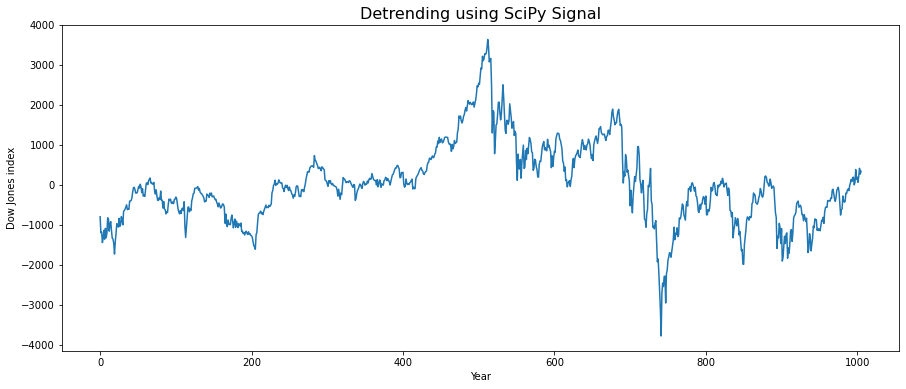

In [25]:
plt.figure(figsize=(15,6))
plt.plot(detrend)
plt.title('Detrending using SciPy Signal', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dow Jones index')
plt.show()

### Detrend Using an HP Filter

+ `Hpfilter` is a submodule of Statmodels that is used to remove a smooth trend

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file = 'data/dow jones.xlsx'
df = pd.read_excel(file, index_col=0, parse_dates=True)

close_cycle, close_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = close_trend
df['cycle'] = close_cycle
df['detrended'] = df['Close'] - df['trend']
df.head()

,Open,High,Low,Close,Adj Close,Volume,trend,cycle,detrended
Date,,,,,,,,,
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000,16008.051100,370.998705,370.998705
2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000,16014.680960,-26.600882,-26.600882
2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000,16021.542694,-5.523163,-5.523163
2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000,16028.851551,-262.111317,-262.111317
2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000,16036.819328,-154.139640,-154.139640


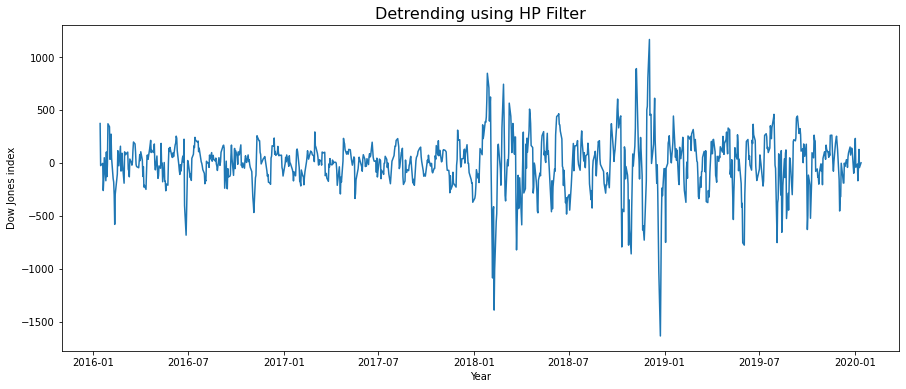

In [28]:
plt.figure(figsize=(15,6))
plt.plot(df['detrended'])
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dow Jones index')
plt.show()

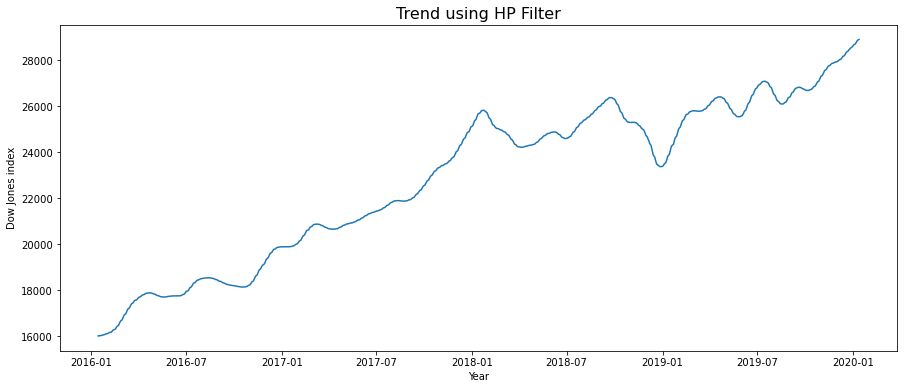

In [29]:
plt.figure(figsize=(15,6))
plt.plot(df['trend'])
plt.title('Trend using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dow Jones index')
plt.show()

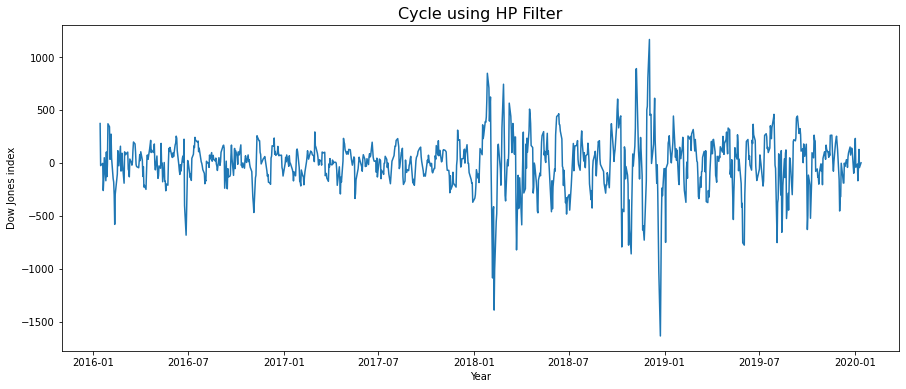

In [30]:
plt.figure(figsize=(15,6))
plt.plot(df['cycle'])
plt.title('Cycle using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dow Jones index')
plt.show()

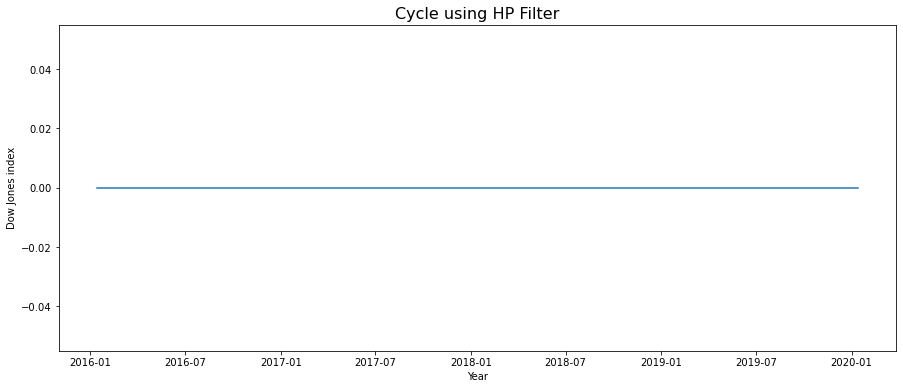

In [31]:
# сравнение df['cycle'] и df['detrended']
plt.figure(figsize=(15,6))
plt.plot(df['cycle']-df['detrended'])
plt.title('Cycle using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dow Jones index')
plt.show()